#**Construcción del Modelo de Heterocedasticidad Condicional Autorregresiva Generalizada**

[*********************100%***********************]  7 of 7 completed


Datos descargados:
Ticker            COST        GOOG         JPM        META        MSFT  \
Date                                                                     
2021-07-30  411.165619  134.736862  137.996216  354.944122  276.670868   
2021-08-02  410.400146  135.502625  137.441620  350.610687  276.583466   
2021-08-03  416.284607  135.792099  139.005432  349.903381  278.816986   
2021-08-04  416.255920  135.541489  137.505264  357.554199  278.224609   
2021-08-05  424.053986  136.449722  139.241837  361.588745  281.147461   

Ticker           NVDA        TSLA  
Date                               
2021-07-30  19.460810  229.066666  
2021-08-02  19.711319  236.556671  
2021-08-03  19.776196  236.580002  
2021-08-04  20.234291  236.973328  
2021-08-05  20.596581  238.210007  

Retornos logarítmicos:
Ticker          COST      GOOG       JPM      META      MSFT      NVDA  \
Date                                                                     
2021-08-02 -0.001863  0.005667 -0.0040

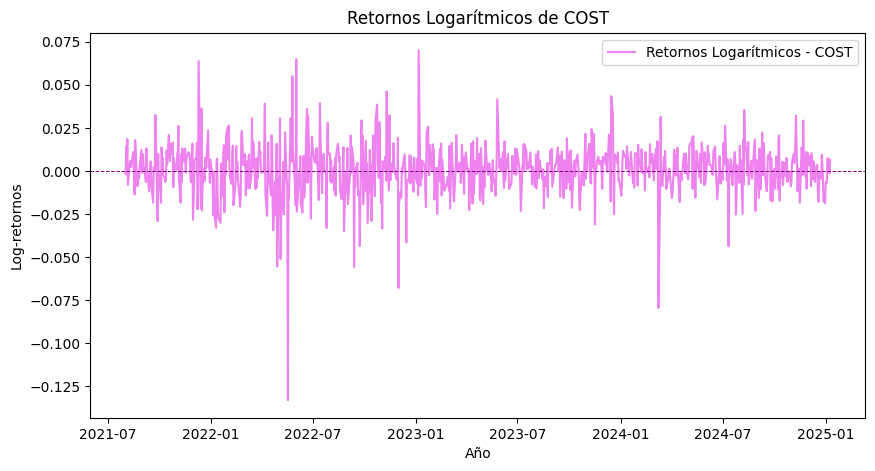

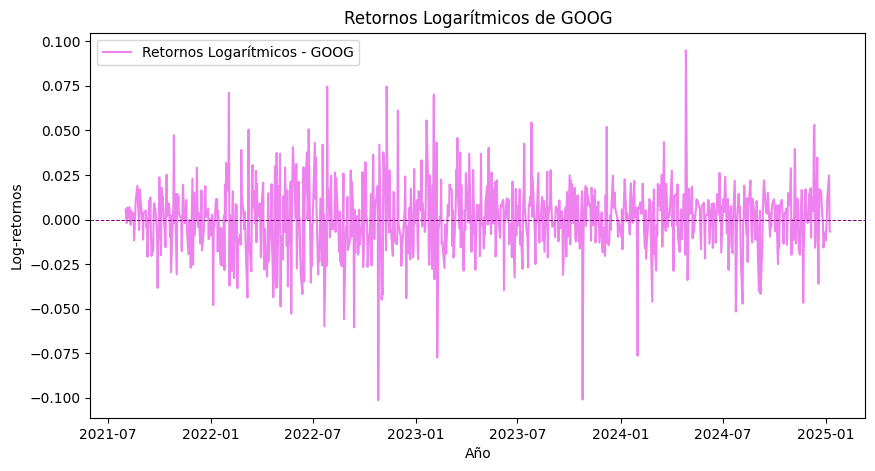

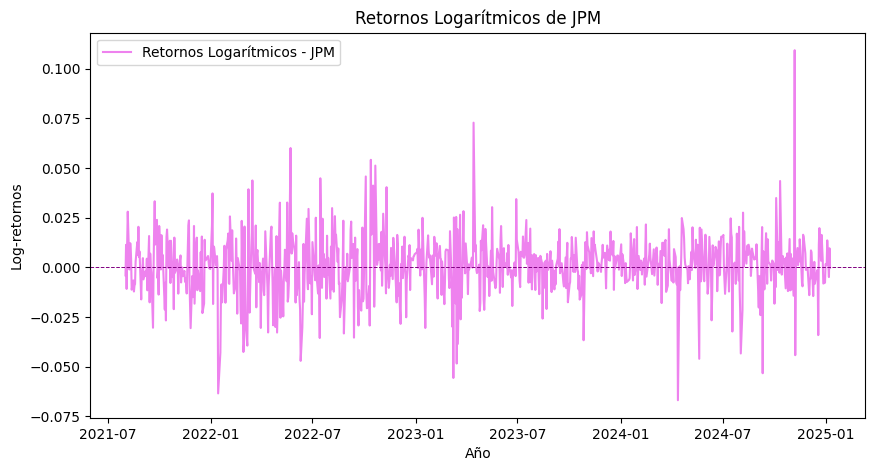

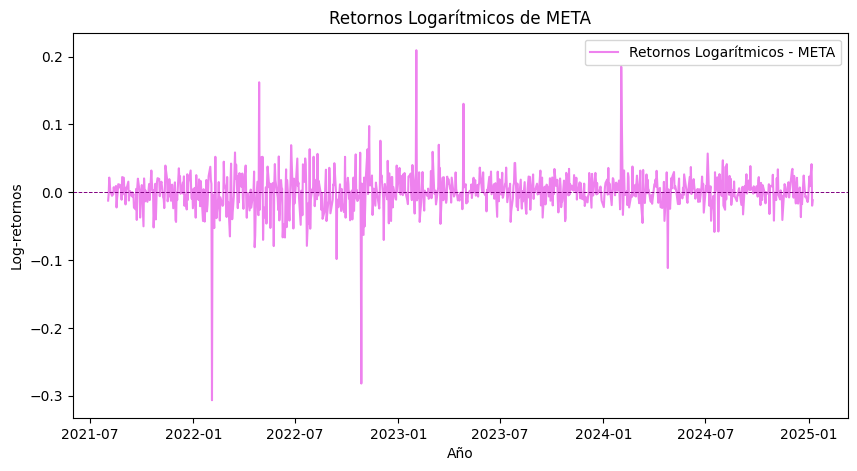

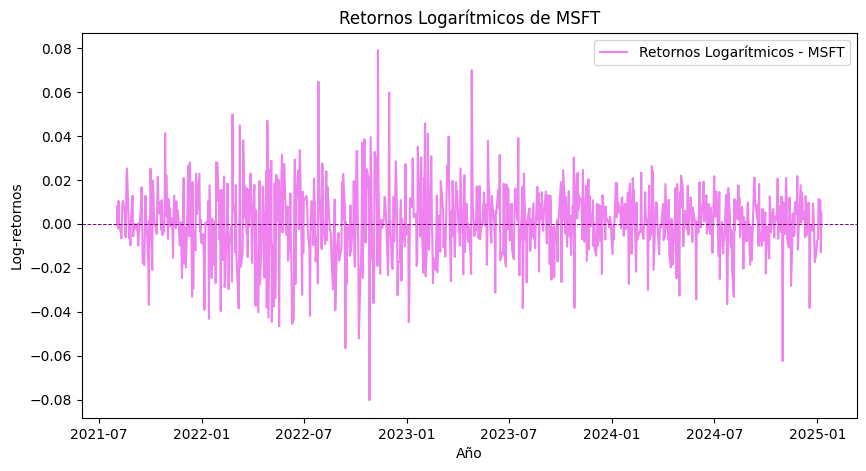

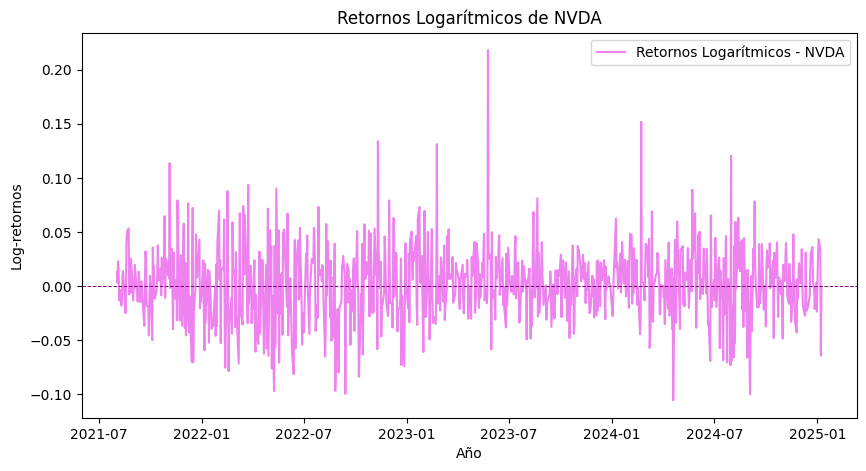

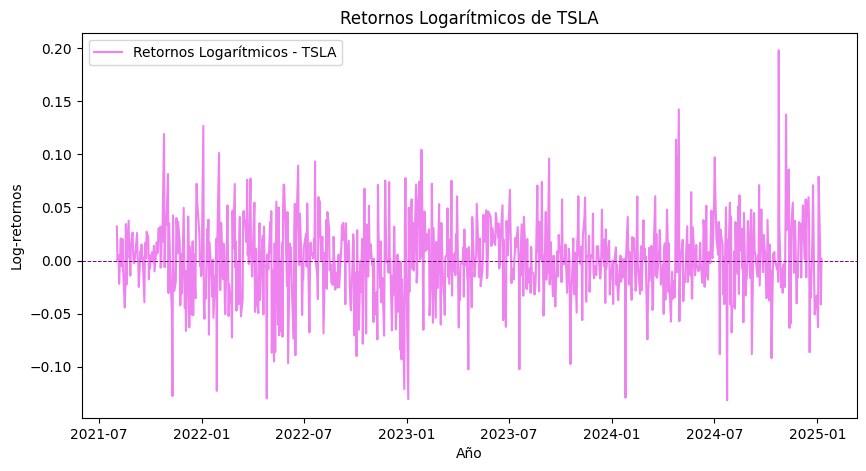

Seleccione una acción para analizar (GOOG, COST, NVDA, TSLA, MSFT, META, JPM): JPM
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    JPM   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2403.46
Distribution:                  Normal   AIC:                          -4798.93
Method:            Maximum Likelihood   BIC:                          -4779.87
                                        No. Observations:                  865
Date:                Thu, Jan 09 2025   Df Residuals:                      864
Time:                        22:46:54   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------

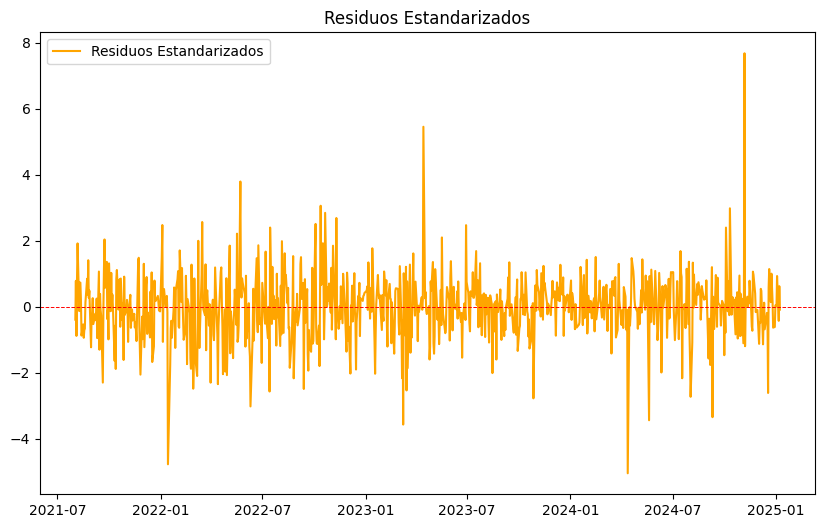

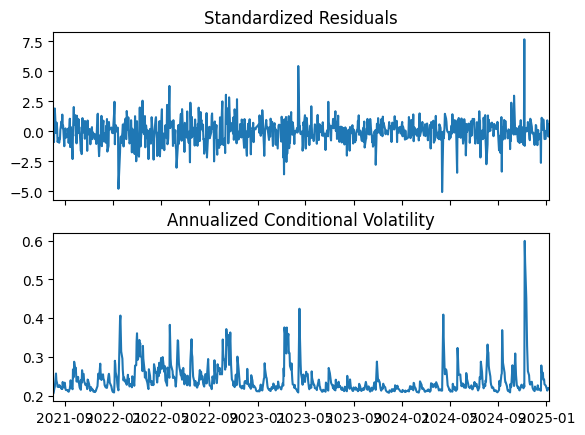

Predicción de volatilidad por día (10 días):
Día 1: 0.000181
Día 2: 0.000196
Día 3: 0.000207
Día 4: 0.000215
Día 5: 0.000221
Día 6: 0.000225
Día 7: 0.000228
Día 8: 0.000230
Día 9: 0.000232
Día 10: 0.000234


In [46]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from arch import arch_model
from datetime import datetime, timedelta

#1. Parámetros y obtención de data histórica de la acción
def configure_analysis(stock, years=5):
    end_date = datetime.now()
    start_date = end_date - timedelta(days=int(years * 252))  #Días hábiles
    return start_date, end_date

#2. Obtención de datos históricos
def data_download(start_date, end_date, stock_symbols):
    prices = yf.download(stock_symbols, start=start_date, end=end_date)['Close']
    if prices.empty:
        raise ValueError("No se obtuvieron datos de precios. Verifique los símbolos, las fechas o la conectividad.")
    return prices

#3. Cálculo de retornos logarítmicos
def log_returns(prices):
    retornos = np.log(prices / prices.shift(1)).dropna()
    if len(retornos) < 30:
        raise ValueError("No hay suficientes datos para calcular retornos.")
    return retornos

#3.1 Gráfico de los retornos logarítmicos para cada acción
def plot_log_returns(retornos):
    for stock in retornos.columns:
        plt.figure(figsize=(10, 5))
        plt.plot(retornos[stock], label=f"Retornos Logarítmicos - {stock}", color="violet")
        plt.axhline(y=0, color="purple", linestyle="--", linewidth=0.7)
        plt.title(f"Retornos Logarítmicos de {stock}")
        plt.xlabel("Año")
        plt.ylabel("Log-retornos")
        plt.legend()
        plt.show()

#4. Creación del Modelo GARCH
def garch_model(retornos):
    modelo = arch_model(retornos, vol='Garch', p=1, q=1, rescale=False)
    results = modelo.fit(disp="off")
    return results

#5. Resumen del modelo
def model_summary(results):
    print(results.summary())

#6. Graficar residuos estandarizados
def plot_residuals(results):
    plt.figure(figsize=(10, 6))
    plt.plot(results.std_resid, label="Residuos Estandarizados", color="orange")
    plt.axhline(y=0, color="red", linestyle="--", linewidth=0.7)
    plt.title("Residuos Estandarizados")
    plt.legend()
    plt.show()

#7. Diagnóstico del modelo
def diagnostic_plots(results):
    fig = results.plot(annualize="D")
    plt.show()

#8. Testing del script
if __name__ == "__main__":
    stock = ["GOOG", "COST", "NVDA", "TSLA", "MSFT", "META", "JPM"]  #Símbolos de acciones
    start_date, end_date = configure_analysis(stock)

    # Descargar datos de precios
    try:
        prices = data_download(start_date, end_date, stock)
    except ValueError as e:
        print(f"Error al descargar datos: {e}")
        exit()
    print(f"Datos descargados:\n{prices.head()}\n")

    # Calcular retornos logarítmicos
    retornos = log_returns(prices)
    print(f"Retornos logarítmicos:\n{retornos.head()}\n")
    plot_log_returns(retornos)

    # Selección interactiva de acción
    selected_stock = input(f"Seleccione una acción para analizar ({', '.join(stock)}): ").strip().upper()
    if selected_stock not in stock or selected_stock not in retornos.columns:
        raise ValueError(f"No se encontraron datos para la acción seleccionada: {selected_stock}")

    # Crear y ajustar el modelo GARCH
    results = garch_model(retornos[selected_stock])
    model_summary(results)

    # Graficar residuos estandarizados
    plot_residuals(results)

    # Gráficos de diagnóstico
    diagnostic_plots(results)

    # Predicciones
    forecast = results.forecast(horizon=10)
    var_forecast = forecast.variance.iloc[-1]  #Extraer la última fila, con las predicciones para los próximos días

    print("Predicción de volatilidad por día (10 días):")
    for i, var in enumerate(var_forecast, start=1):
     print(f"Día {i}: {var:.6f}")


